<a href="https://colab.research.google.com/github/untari-nw/Lung-Type-and-Mutation-Detection/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Join Classifier of Type and Index Mutation on Lung Cancer DNA using Sequential Labeling Model**

---



Authors:
- Untari Novia Wisesty (1, 3)
- Ayu Purwarianti (1, 3)
- Adi Pancoro (2)
- Amrita Chattopadhyay (4)
- Nam Nhut Phan (5, 6, 7)
- Eric Y. Chuang (5, 7, 8)
- Tati Rajab Mengko (1)

Affiliation:
1. School of Electrical and Information Engineering, Bandung Institute of Technology, Bandung, Indonesia 
2. School of Life Sciences and Technology, Bandung Institute of Technology, Bandung, Indonesia
3. U-CoE AI-VLB
4. Department of Medical Research, Chine Medical University Hospital, Taichiung, Taiwan
5. Bioinformatics and Biostatistics Core, Centre of Genomic and Precision Medicine, National Taiwan University, Taipei 10055, Taiwan
6. Bioinformatics Program, Taiwan International Graduate Program, Institute of Information Science, Academia Sinica, Taipei, Taiwan
7. Graduate Institute of Biomedical Electronics and Bioinformatics, Department of Electrical Engineering, National Taiwan University, Taiwan
8. Master Program for Biomedical Engineering, China Medical University, Taichung 40402, Taiwan


---



This source code is developed and run in Google Collaboratory, as well as data storage using Google Drive. Please make some modifications for the data path and some code according to the environment you are using.

**Path**

In [ ]:
from google.colab import drive
drive._mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Paper SK2/'
datapath = path + 'Dataset/'
modelpath = path + 'Model/'
gene = 'EGFR' #

In [ ]:
import csv
import pandas as pd
import numpy as np
from random import sample

# Parsing function: Delins, Ins, Del, Dup, SNV

In [ ]:
# Delins parsing function
def DelinsParsing(str1):
  angka = '0123456789'
  tanda = '-+'
  ii=0
  cr=''
  while (str1[ii] not in angka) & (str1[ii] not in tanda): #find the start index of the mutation
    ii=ii+1
  if (str1[ii] in tanda): #if the start of the mutation is marked with a + or - sign
    cr = cr+str1[ii]
    ii=ii+1
  while (str1[ii] in angka): #find index mutation
    cr=cr+str1[ii]
    ii=ii+1
  lokasi = int(cr)
  
  if (str1[ii] in tanda): #if the mutation point is in the format a+b
    cr = ''
    cr=cr+str1[ii]
    ii=ii+1
    while (str1[ii] in angka):
      cr=cr+str1[ii]
      ii=ii+1
    lokasi = lokasi + int(cr)

  if (str1[ii]=='_'):
    ii=ii+1
    cr=''
    if (str1[ii] in tanda): #if the start of the mutation is marked with a + or - sign
      cr = cr+str1[ii]
      ii=ii+1
    while (str1[ii] in angka):
      cr=cr+str1[ii]
      ii=ii+1
    titik2 = int(cr)
    if (str1[ii] in tanda): #if the mutation point is in the format a+b
      cr = ''
      cr=cr+str1[ii]
      ii=ii+1
      while (str1[ii] in angka):
        cr=cr+str1[ii]
        ii=ii+1
      titik2 = titik2 + int(cr)

    panjang = titik2-lokasi+1
    if (panjang<1):
      panjang = 1
  else:
    panjang=1
  nukl = 'ACTGNactg'
  while (str1[ii] not in nukl):
    ii=ii+1
  ganti=str1[ii:len(str1)]
  return [lokasi, panjang, ganti]

# Ins parsing function
def InsParsing(str1):
  angka='0123456789'
  tanda = '-+'
  ii=0
  cr=''
  while (str1[ii] not in angka) & (str1[ii] not in tanda):
    ii=ii+1
  if (str1[ii] in tanda): 
    cr = cr+str1[ii]
    ii=ii+1
  while (str1[ii] in angka): 
    cr=cr+str1[ii]
    ii=ii+1
  lokasi = int(cr)
  
  if (str1[ii] in tanda): 
    cr = ''
    cr=cr+str1[ii]
    ii=ii+1
    while (str1[ii] in angka):
      cr=cr+str1[ii]
      ii=ii+1
    lokasi = lokasi + int(cr)

  if (str1[ii]=='_'):
    ii=ii+1
    cr=''
    if (str1[ii] in tanda): 
      cr = cr+str1[ii]
      ii=ii+1
    while (str1[ii] in angka):
      cr=cr+str1[ii]
      ii=ii+1
    titik2 = int(cr)
    if (str1[ii] in tanda): 
      cr = ''
      cr=cr+str1[ii]
      ii=ii+1
      while (str1[ii] in angka):
        cr=cr+str1[ii]
        ii=ii+1
      titik2 = titik2 + int(cr)

    panjang = titik2-lokasi+1
    if (panjang<1):
      panjang = 1
  else:
    panjang=1
  nukl = 'ACTGNactg'
  while (str1[ii] not in nukl):
    ii=ii+1
  ganti=str1[ii:len(str1)]
  return [lokasi, panjang, ganti]

# Del parsing function
def DelParsing(str1):
  angka='0123456789'
  tanda = '-+'
  ii=0
  cr=''
  while (str1[ii] not in angka) & (str1[ii] not in tanda):
    ii=ii+1
  if (str1[ii] in tanda): 
    cr = cr+str1[ii]
    ii=ii+1
  while (str1[ii] in angka):
    cr=cr+str1[ii]
    ii=ii+1
  lokasi = int(cr)
  
  if (str1[ii] in tanda): 
    cr = ''
    cr=cr+str1[ii]
    ii=ii+1
    while (str1[ii] in angka):
      cr=cr+str1[ii]
      ii=ii+1
    lokasi = lokasi + int(cr)

  if (str1[ii]=='_'):
    ii=ii+1
    cr=''
    if (str1[ii] in tanda): 
      cr = cr+str1[ii]
      ii=ii+1
    while (str1[ii] in angka):
      cr=cr+str1[ii]
      ii=ii+1
    titik2 = int(cr)
    if (str1[ii] in tanda): 
      cr = ''
      cr=cr+str1[ii]
      ii=ii+1
      while (str1[ii] in angka):
        cr=cr+str1[ii]
        ii=ii+1
      titik2 = titik2 + int(cr)

    panjang = titik2-lokasi+1
    if (panjang<1):
      panjang = 1
  else:
    panjang=1
  ganti='N'
  return [lokasi, panjang, ganti]

# Dup parsing function
def DupParsing(str1):
  angka='0123456789'
  tanda = '-+'
  ii=0
  cr=''
  while (str1[ii] not in angka) & (str1[ii] not in tanda):
    ii=ii+1
  if (str1[ii] in tanda): 
    cr = cr+str1[ii]
    ii=ii+1
  while (str1[ii] in angka): 
    cr=cr+str1[ii]
    ii=ii+1
  lokasi = int(cr)
  
  if (str1[ii] in tanda):
    cr = ''
    cr=cr+str1[ii]
    ii=ii+1
    while (str1[ii] in angka):
      cr=cr+str1[ii]
      ii=ii+1
    lokasi = lokasi + int(cr)

  if (str1[ii]=='_'):
    ii=ii+1
    cr=''
    if (str1[ii] in tanda): 
      cr = cr+str1[ii]
      ii=ii+1
    while (str1[ii] in angka):
      cr=cr+str1[ii]
      ii=ii+1
    titik2 = int(cr)
    if (str1[ii] in tanda): 
      cr = ''
      cr=cr+str1[ii]
      ii=ii+1
      while (str1[ii] in angka):
        cr=cr+str1[ii]
        ii=ii+1
      titik2 = titik2 + int(cr)

    panjang = titik2-lokasi+1
    if (panjang<1):
      panjang = 1
  else:
    panjang=1
  ganti='N'
  return [lokasi, panjang, ganti]

# SNV parsing function
def SNVParsing(str1):
  angka='0123456789'
  tanda = '-+'
  ii=0
  cr=''
  while (str1[ii] not in angka) & (str1[ii] not in tanda):
    ii=ii+1
  if (str1[ii] in tanda): 
    cr = cr+str1[ii]
    ii=ii+1
  while (str1[ii] in angka): 
    cr=cr+str1[ii]
    ii=ii+1
  lokasi = int(cr)
  
  if (str1[ii] in tanda): 
    cr = ''
    cr=cr+str1[ii]
    ii=ii+1
    while (str1[ii] in angka):
      cr=cr+str1[ii]
      ii=ii+1
    lokasi = lokasi + int(cr)
  panjang=1
  ii=ii+2
  ganti=str1[ii]
  return [lokasi, panjang, ganti]

# Parsing Mutation Call File from Cosmic

Download the mutation call file data from https://cancer.sanger.ac.uk/cosmic.
Go to menu: Tools -> Cancer Browser.
Select:
- Tissue selection: Lung.
- Sub-tissue selection: Include all.
- Histology selection: Carcinoma.
- Sub-histology selection: Include all.
- Filter by screen type: Targeted Sreens.

Select "Gene with Mutations" tab, and select one gene, for example EGFR gene (open in new tab).
In the tab EGFR gene, you can save the cDNA sequence, which is the reference gene for the EGFR gene, and is later used to generate the patient's sequence.
In the "Mutation Distribution" section, you can save the subtitution, insertion, and deletion data to file csv, and combine all muation data.
The data should be like this:
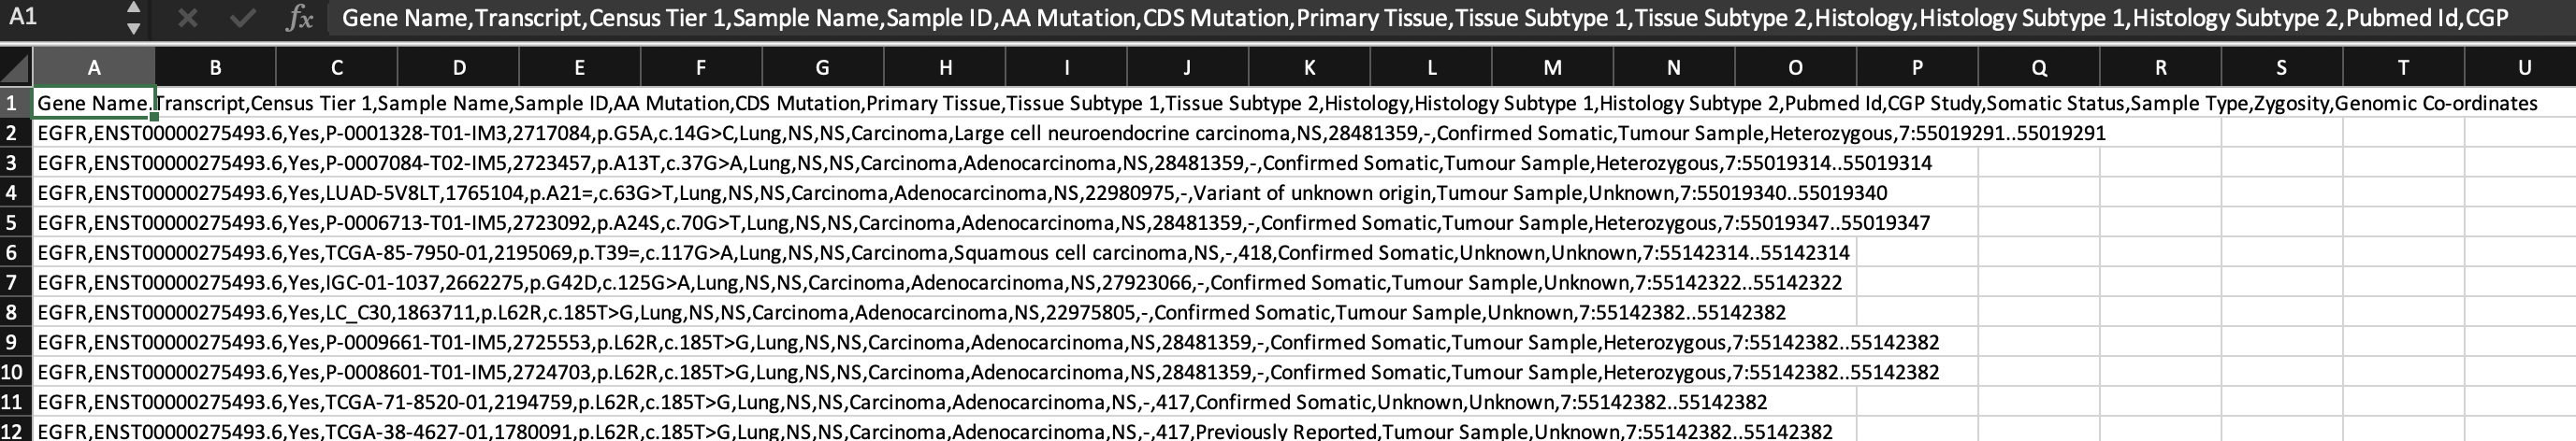
In this research we use 10 gene in lung cancer (as mention in our paper) and all gene transcript.
Save the mutation data to one file "Lung Mutation Call.csv" and you can start run this code.

In [ ]:
readpath = datapath + gene + ' Mutation Call.csv'
df = pd.read_csv(readpath, header=0)
print(len(df))
print(df)

19901
       Sample ID             Gene Name CDS Mutation  ... Location Length  Change
0        2717084                  EGFR      c.14G>C  ...       14      1       C
1        2723457                  EGFR      c.37G>A  ...       37      1       A
2        1765104                  EGFR      c.63G>T  ...       63      1       T
3        2723092                  EGFR      c.70G>T  ...       70      1       T
4        2195069                  EGFR     c.117G>A  ...      117      1       A
...          ...                   ...          ...  ...      ...    ...     ...
19896    1759198  EGFR_ENST00000638463    c.1309A>G  ...     1309      1       G
19897    2480822  EGFR_ENST00000638463    c.1309A>G  ...     1309      1       G
19898    1765135  EGFR_ENST00000638463    c.1316C>G  ...     1316      1       G
19899    1423769  EGFR_ENST00000638463    c.1333G>A  ...     1333      1       A
19900    1780147  EGFR_ENST00000638463    c.1338G>T  ...     1338      1       T

[19901 rows x 8 colum

In [ ]:
savepath = datapath + gene + ' Mutation Call Processed.csv'
with open(savepath, mode='w') as csv_file:
  fieldnames = ['Sample_ID', 'Gene_Name', 'CDS_Mutation', 'Primary_Tissue', 'Mutation_Type', 'Location', 'Length', 'Change']
  writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

  writer.writeheader()
  for jj in range (0,len(df)):
    str1=df['CDS Mutation'][jj]
    if (type(str1)==str) and ('?' not in str1):
      if ('>' in str1): # Single Nucleotide Variant
        jenis='snv'
        [lokasi, panjang, ganti]=SNVParsing(str1)
      elif ('delins' in str1): # Deletion Insertion
        jenis='delins'
        [lokasi, panjang, ganti]=DelinsParsing(str1)
      elif ('ins' in str1): # Insertion
        jenis='ins'
        [lokasi, panjang, ganti]=InsParsing(str1)
      elif ('del' in str1): # Deletion
        jenis='del'
        [lokasi, panjang, ganti]=DelParsing(str1)
      elif ('dup' in str1): # Duplicate
        jenis='dup'
        [lokasi, panjang, ganti]=DupParsing(str1)
      if (lokasi>0):
        writer.writerow({'Sample_ID': df['Sample ID'][jj],
                        'Gene_Name': df['Gene Name'][jj],
                        'CDS_Mutation': df['CDS Mutation'][jj],
                        'Primary_Tissue':df['Primary Tissue'][jj],
                        'Mutation_Type':jenis, 'Location':lokasi,
                        'Length':panjang, 'Change':ganti})
print('Done')

Done


# Preprocess Reference Sequence

In [ ]:
# Parsing reference sequence
import glob
import os

refpath = datapath+'RefSeq/'
os.chdir(refpath)
txt_files = glob.glob('*.fasta')

for files in txt_files:
  readpath = refpath + files
  savepath = refpath + 'temp_RefSeq/'+'temp_' + files
  with open(files,'r') as readfile: # Parse sequence
    with open(savepath,'w') as writefile:
      for line in readfile:
        if (line[0]!='>'):
          writefile.write(line[0:len(line)-1])

In [ ]:
# Calculate sequence length
import glob
import os

refpath = datapath+'RefSeq/temp_RefSeq/'
os.chdir(refpath)
txt_files = glob.glob('*.fasta')

for files in txt_files:
  readpath = refpath + files
  f = open(readpath, "r")
  sekuens = f.read()
  f.close()
  print(files, len(sekuens))

temp_KRAS.fasta 569
temp_KRAS_ENST00000311936.fasta 566
temp_KRAS_ENST00000556131.fasta 131
temp_KRAS_ENST00000557334.fasta 227
temp_TP53_ENST00000445888.fasta 1181
temp_TP53.fasta 1181
temp_TP53_ENST00000504290.fasta 644
temp_TP53_ENST00000413465.fasta 857
temp_TP53_ENST00000420246.fasta 1025
temp_TP53_ENST00000504937.fasta 785
temp_TP53_ENST00000359597.fasta 1031
temp_TP53_ENST00000610292.fasta 1064
temp_TP53_ENST00000455263.fasta 1040
temp_TP53_ENST00000510385.fasta 629
temp_TP53_ENST00000610538.fasta 923
temp_TP53_ENST00000615910.fasta 1148
temp_TP53_ENST00000610623.fasta 563
temp_TP53_ENST00000617185.fasta 1025
temp_TP53_ENST00000618944.fasta 548
temp_TP53_ENST00000619186.fasta 704
temp_TP53_ENST00000619485.fasta 1064
temp_TP53_ENST00000620739.fasta 1064
temp_TP53_ENST00000622645.fasta 908
temp_CTNNB1.fasta 2345
temp_CTNNB1_ENST00000349496.fasta 2345
temp_CTNNB1_ENST00000396183.fasta 2345
temp_CTNNB1_ENST00000396185.fasta 2345
temp_CTNNB1_ENST00000405570.fasta 2345
temp_CTNNB1_ENS

# Preprocess Mutated DNA Sequence and Target Sequence

In [ ]:
# Load and Sort location mutation
readpath = datapath + gene + ' Mutation Call Processed.csv'
df = pd.read_csv(readpath, header=0)
dfMut = df.sort_values(by='Location', ascending=False)
print(dfMut)
print(len(dfMut))
print(gene)

       Sample_ID             Gene_Name CDS_Mutation  ... Location Length  Change
4010     2727199                  EGFR    c.3553G>A  ...     3553      1       A
4009     2776316                  EGFR    c.3521A>G  ...     3521      1       G
4008     2480880                  EGFR    c.3499C>G  ...     3499      1       G
4007     2776233                  EGFR    c.3477G>C  ...     3477      1       C
4006     2637267                  EGFR    c.3426C>G  ...     3426      1       G
...          ...                   ...          ...  ...      ...    ...     ...
13089    2717084  EGFR_ENST00000344576      c.14G>C  ...       14      1       C
13327    2717084  EGFR_ENST00000454757      c.14G>C  ...       14      1       C
0        2717084                  EGFR      c.14G>C  ...       14      1       C
19794    1780156  EGFR_ENST00000638463      c.12G>T  ...       12      1       T
19795    1914124  EGFR_ENST00000638463      c.12G>T  ...       12      1       T

[19901 rows x 8 columns]
19

## Generate mutated DNA sequence and target sequence

In [ ]:
# Creating dataframe
dfSeq = pd.DataFrame(columns = ['Idx','Sample_ID', 'Gene_Name', 'Sequence']) #for mutated DNA sequence
dfTarget = pd.DataFrame(columns = ['Idx','Sample_ID', 'Gene_Name', 'Sequence']) #for target sequence

idx=0
idx_temp = 0
for jj in range (0,len(dfMut)):
  print(jj)
  cek = dfSeq.loc[(dfSeq['Sample_ID'] == dfMut['Sample_ID'][jj]) & (dfSeq['Gene_Name'] == dfMut['Gene_Name'][jj])]       
  if cek.empty: # Sample ID doesn't exist in dfSeq
    dirSeq = datapath+'RefSeq/temp_RefSeq/'+'temp_'+dfMut['Gene_Name'][jj]+'.fasta'
    # Read the parsed sequence
    with open(dirSeq,'r') as readfile:
      for line in readfile:
        sekuens = line
    n = len(sekuens)
    seqTarget = 'o' * n
  else: # Sample ID already in dfSeq
    id = dfMut['Sample_ID'][jj]
    idx = dfSeq[(dfSeq['Sample_ID'] == dfMut['Sample_ID'][jj]) & (dfSeq['Gene_Name'] == dfMut['Gene_Name'][jj])].index.item()
    #print(dfSeq[dfSeq['Sample_ID']==id].index.item())
    sekuens = dfSeq['Sequence'][idx]
    seqTarget = dfTarget['Sequence'][idx]
  
  # Mutate sequence
  s = list(sekuens)
  sTarget = list(seqTarget)
  lokasi = (dfMut['Location'][jj])-1
  panjang = dfMut['Length'][jj]
  ganti = dfMut['Change'][jj]
  if (lokasi<=len(s)): #if the true mutation location is in the sequence then it is processed
    if (dfMut['Mutation_Type'][jj] == 'snv'):
      # mutated DNA sequence:
      s[lokasi]=ganti
      # target sequence:
      sTarget[lokasi]='s'
    elif (dfMut['Mutation_Type'][jj] == 'del'):
      # mutated DNA sequence:
      s1 = s[:(lokasi)]
      s3 = s[(lokasi+panjang):]
      s = s1 + s3
      # target sequence:
      sTarget[lokasi-1] = 'd'
      s1 = sTarget[:(lokasi)]
      s3 = sTarget[(lokasi+panjang):]
      sTarget = s1 + s3
    elif (dfMut['Mutation_Type'][jj] == 'ins'):
      # mutated DNA sequence:
      s1 = s[:lokasi]
      s2 = list(ganti)
      s3 = s[lokasi+panjang:]
      s = s1+s2+s3
      # target sequence:
      n = len(ganti)
      gantiTarget = 'i' * n
      s1 = sTarget[:lokasi]
      s2 = list(gantiTarget)
      s3 = sTarget[lokasi+panjang:]
      sTarget = s1+s2+s3
    elif (dfMut['Mutation_Type'][jj] == 'delins'):
      # mutated DNA sequence:
      s1 = s[:lokasi]
      s2 = list(ganti)
      s3 = s[lokasi+panjang:]
      s = s1+s2+s3
      # target sequence:
      n = len(ganti)
      gantiTarget = 'e' * n
      s1 = sTarget[:lokasi]
      s2 = list(gantiTarget)
      s3 = sTarget[lokasi+panjang:]
      sTarget = s1+s2+s3
    elif (dfMut['Mutation_Type'][jj] == 'dup'):
      # mutated DNA sequence:
      s1 = s[:lokasi]
      s2 = s[lokasi:(lokasi+panjang)]
      s3 = s[lokasi+panjang:]
      s = s1+s2+s2+s3
      # target sequence:
      gantiTarget = 'i' * panjang
      gantiTarget = list(gantiTarget)
      s1 = sTarget[:lokasi]
      s2 = sTarget[lokasi:(lokasi+panjang)]
      s3 = sTarget[lokasi+panjang:]
      sTarget = s1+s2+gantiTarget+s3

    sekuens = ''.join([str(elem) for elem in s])
    seqTarget = ''.join([str(elem) for elem in sTarget])

    if cek.empty: # Sample ID doesn't exist in dfSeq
      idx_temp = idx_temp + 1
      idx = idx_temp
      dfSeq = dfSeq.append({'Idx' : idx, 'Sample_ID' : dfMut['Sample_ID'][jj],
                      'Gene_Name' : dfMut['Gene_Name'][jj],
                      'Sequence' : sekuens}, ignore_index = True)
      dfTarget = dfTarget.append({'Idx' : idx, 'Sample_ID' : dfMut['Sample_ID'][jj],
                    'Gene_Name' : dfMut['Gene_Name'][jj],
                    'Sequence' : seqTarget},  
                    ignore_index = True)
    else:
      dfSeq.at[(dfSeq[(dfSeq['Sample_ID'] == dfMut['Sample_ID'][jj]) & (dfSeq['Gene_Name'] == dfMut['Gene_Name'][jj])].index.item()),'Sequence'] = sekuens
      dfTarget.at[(dfTarget[(dfTarget['Sample_ID'] == dfMut['Sample_ID'][jj]) & (dfTarget['Gene_Name'] == dfMut['Gene_Name'][jj])].index.item()),'Sequence'] = seqTarget

dfSeq = dfSeq[['Idx','Sample_ID','Gene_Name','Sequence']]
dfTarget = dfTarget[['Idx','Sample_ID','Gene_Name','Sequence']]
dfSeq.to_csv(datapath + gene + 'SeqData.csv')
dfTarget.to_csv(datapath + gene + 'TargetSeqData.csv')
print(len(dfSeq))
print(len(dfTarget))

Streaming output truncated to the last 5000 lines.
14903
14904
14905
14906
14907
14908
14909
14910
14911
14912
14913
14914
14915
14916
14917
14918
14919
14920
14921
14922
14923
14924
14925
14926
14927
14928
14929
14930
14931
14932
14933
14934
14935
14936
14937
14938
14939
14940
14941
14942
14943
14944
14945
14946
14947
14948
14949
14950
14951
14952
14953
14954
14955
14956
14957
14958
14959
14960
14961
14962
14963
14964
14965
14966
14967
14968
14969
14970
14971
14972
14973
14974
14975
14976
14977
14978
14979
14980
14981
14982
14983
14984
14985
14986
14987
14988
14989
14990
14991
14992
14993
14994
14995
14996
14997
14998
14999
15000
15001
15002
15003
15004
15005
15006
15007
15008
15009
15010
15011
15012
15013
15014
15015
15016
15017
15018
15019
15020
15021
15022
15023
15024
15025
15026
15027
15028
15029
15030
15031
15032
15033
15034
15035
15036
15037
15038
15039
15040
15041
15042
15043
15044
15045
15046
15047
15048
15049
15050
15051
15052
15053
15054
15055
15056
15057
15058
15059
15060
1

## Check generated sequence

In [ ]:
# Load and Sort location mutation
dfSeq = pd.read_csv(datapath + gene + 'SeqData.csv', header=0)
dfTarget = pd.read_csv(datapath + gene + 'TargetSeqData.csv', header=0)
dfSeq = dfSeq[['Idx','Sample_ID','Gene_Name','Sequence']]
dfTarget = dfTarget[['Idx','Sample_ID','Gene_Name','Sequence']]
print('dfSeq: ', len(dfSeq), dfSeq.head())
print('dfTarget: ', len(dfTarget), dfTarget.head())

dfSeq:  18202    Idx  Sample_ID Gene_Name                                           Sequence
0    1    2717084      EGFR  ATGCGACCCTCCGCGACGGCCGGGGCAGCGCTCCTGGCGCTGCTGG...
1    2    2723457      EGFR  ATGCGACCCTCCGGGACGGCCGGGGCAGCGCTCCTGACGCTGCTGG...
2    3    1765104      EGFR  ATGCGACCCTCCGGGACGGCCGGGGCAGCGCTCCTGGCGCTGCTGG...
3    4    2723092      EGFR  ATGCGACCCTCCGGGACGGCCGGGGCAGCGCTCCTGGCGCTGCTGG...
4    5    2195069      EGFR  ATGCGACCCTCCGGGACGGCCGGGGCAGCGCTCCTGGCGCTGCTGG...
dfTarget:  18202    Idx  Sample_ID Gene_Name                                           Sequence
0    1    2717084      EGFR  ooooooooooooosoooooooooooooooooooooooooooooooo...
1    2    2723457      EGFR  oooooooooooooooooooooooooooooooooooosooooooooo...
2    3    1765104      EGFR  oooooooooooooooooooooooooooooooooooooooooooooo...
3    4    2723092      EGFR  oooooooooooooooooooooooooooooooooooooooooooooo...
4    5    2195069      EGFR  oooooooooooooooooooooooooooooooooooooooooooooo...


In [ ]:
# Checks whether the order of data in dfSeq and dfTarget is the same
for jj in range (0,len(dfSeq)):
  if (dfSeq['Sample_ID'][jj] != dfTarget['Sample_ID'][jj]) or (dfSeq['Gene_Name'][jj] != dfTarget['Gene_Name'][jj]):
    print(dfSeq['Sample_ID'][jj],dfSeq['Gene_Name'][jj],'False')
print('done')

done


In [ ]:
# Check if there is a redundant combination of Sample_ID and Gene_Name
for jj in range (0,len(dfSeq)):
  cek = dfSeq.loc[(dfSeq['Sample_ID'] == dfSeq['Sample_ID'][jj]) & (dfSeq['Gene_Name'] == dfSeq['Gene_Name'][jj])]
  if (len(cek)>1):
    print(dfSeq['Sample_ID'][jj],dfSeq['Gene_Name'][jj],'False')
print('done')

done


# Data Division: Training and Testing set

Training : Testing set proportion = 90:10.

The distribution of training and testing data is carried out on each gene transcript with the number of mutations in the training set greater than the testing set for each type of mutation.

In [ ]:
# Load data
dfTarget = pd.read_csv(datapath + gene + 'TargetSeqData.csv')
dfType = dfTarget[['Idx', 'Sample_ID','Gene_Name']]
dfType['SNV'] = 0
dfType['Insertion'] = 0
dfType['Deletion'] = 0
dfType['Delins'] = 0
dfType['Dataset'] = 0 # Value 0 for training data and 1 for testing data
print(dfType.head())

   Idx  Sample_ID Gene_Name  SNV  Insertion  Deletion  Delins  Dataset
0    1    2717084      EGFR    0          0         0       0        0
1    2    2723457      EGFR    0          0         0       0        0
2    3    1765104      EGFR    0          0         0       0        0
3    4    2723092      EGFR    0          0         0       0        0
4    5    2195069      EGFR    0          0         0       0        0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Count the number of mutations in each sequence

In [ ]:
# s (SNV), d (deletion), i (insertion), e (delins)
for jj in range (0,len(dfType)):
  str1 = dfTarget['Sequence'][jj]
  dfType['SNV'][jj] = str1.count('s')
  dfType['Insertion'][jj] = str1.count('i')
  dfType['Deletion'][jj] = str1.count('d')
  dfType['Delins'][jj] = str1.count('e')
print(dfType.head())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Se

   Idx  Sample_ID Gene_Name  SNV  Insertion  Deletion  Delins  Dataset
0    1    2717084      EGFR    4          0         0       0        0
1    2    2723457      EGFR    2          0         0       0        0
2    3    1765104      EGFR    1          0         0       0        0
3    4    2723092      EGFR    1          0         0       0        0
4    5    2195069      EGFR    1          0         0       0        0


Check if there are sequences that don't have mutations:

In [ ]:
for jj in range (0,len(dfType)):
  cek = dfType['SNV'][jj] + dfType['Insertion'][jj] + dfType['Deletion'][jj] + dfType['Delins'][jj]
  if (cek == 0):
    print(dfType['Sample_ID'][jj], dfType['Gene_Name'][jj])

The distribution of training and testing data, the number of mutations in the testing data is smaller than the training data.

In [ ]:
ts = 0.1 #percentage of test data
geneName = dfType.Gene_Name.unique()
for gene1 in geneName:
  cek = dfType[dfType['Gene_Name']==gene1]
  id = np.unique(np.array(cek['Idx']))
  n = len(id)
  if n>1:
    if n>=10:
      proporsiTest = int(ts*len(id))
    else:
      proporsiTest = 1
    acc1 = 0
    while (acc1 == 0):
      idtest = sample(list(id), proporsiTest)
      idtest = np.array(idtest) - 1
      snvTest = dfType.iloc[idtest,3].sum(axis=0)
      snvTrain = cek.iloc[:,3].sum(axis = 0) - snvTest
      insTest = dfType.iloc[idtest,4].sum(axis=0)
      insTrain = cek.iloc[:,4].sum(axis = 0) - insTest
      delTest = dfType.iloc[idtest,5].sum(axis=0)
      delTrain = cek.iloc[:,5].sum(axis = 0) - delTest
      delinsTest = dfType.iloc[idtest,6].sum(axis=0)
      delinsTrain = cek.iloc[:,6].sum(axis = 0) - delinsTest
      if ((snvTest<=snvTrain).all() & (insTest<=insTrain).all() & (delTest<=delTrain).all() & (delinsTest<=delinsTrain).all()):
        acc1 = 1
        dfType.iloc[idtest, 7] = 1 #assign column Dataset

# Save the result of data division
dfType.to_csv(datapath + gene + 'DataDivision.csv')

print('Proporsi data train: ')
cek = dfType[dfType['Dataset']==0]
print('Jumlah data train: ', len(cek))
print('Jumlah mutasi SNV, Insertion, Deletion, Delins: ')
print(cek.iloc[:,3].sum(axis = 0),cek.iloc[:,4].sum(axis = 0),
      cek.iloc[:,5].sum(axis = 0), cek.iloc[:,6].sum(axis = 0))
print('Proporsi data test: ')
cek = dfType[dfType['Dataset']==1]
print('Jumlah data test: ', len(cek))
print('Jumlah mutasi SNV, Insertion, Deletion, Delins: ')
print(cek.iloc[:,3].sum(axis = 0),cek.iloc[:,4].sum(axis = 0),
      cek.iloc[:,5].sum(axis = 0), cek.iloc[:,6].sum(axis = 0))

Proporsi data train: 
Jumlah data train:  16386
Jumlah mutasi SNV, Insertion, Deletion, Delins: 
11196 4725 6070 216
Proporsi data test: 
Jumlah data test:  1816
Jumlah mutasi SNV, Insertion, Deletion, Delins: 
1197 576 678 36
